<a href="https://colab.research.google.com/github/wuwewij/bachelor_thesis/blob/main/build-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision.models import resnet50

# 加载预训练的ResNet-50模型
model = resnet50(pretrained=True)




Shape of the FC matrix: tensor([[-0.0092,  0.0104, -0.0072,  ..., -0.0104, -0.0168, -0.0215],
        [ 0.0153, -0.0266,  0.0664,  ..., -0.0018, -0.0059,  0.0239],
        [-0.0375,  0.0005, -0.0393,  ..., -0.0348, -0.0287,  0.0809],
        ...,
        [-0.0105,  0.0288,  0.0130,  ..., -0.0170, -0.0214,  0.0010],
        [ 0.0011, -0.0210, -0.0249,  ...,  0.1071, -0.0048, -0.0440],
        [-0.0265, -0.0067, -0.0015,  ...,  0.0277, -0.0133,  0.0180]])


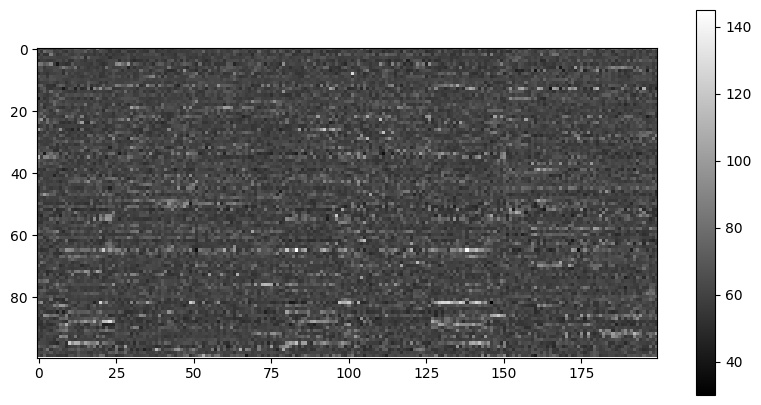

In [ ]:
fc_weights = model.fc.weight.data  # 形状为(1000, 2048)
fc_bias = model.fc.bias.data       # 形状为(1000,)
# 将偏置扩展成一个新的行向量，并与权重矩阵合并
fc_weights_reshaped = fc_weights.t()

# 确认矩阵的形状
print("Shape of the FC matrix:", fc_weights.t())  # 应该输出: Shape of the FC matrix: torch.Size([2049, 1000])
import numpy as np
import matplotlib.pyplot as plt

# 假设 fc_weights_reshaped 是我们的[1000, 2048]形状的权重张量


# 归一化权重到[0, 255]
fc_weights_normalized = (fc_weights_reshaped - fc_weights_reshaped.min()) / (fc_weights_reshaped.max() - fc_weights_reshaped.min()) * 255
fc_weights_normalized = fc_weights_normalized.numpy().astype(np.uint8)

# 由于直接保存为1000*2048的图像不太实际，这里我们简单地查看一部分数据
# 选择一部分数据进行可视化
plt.figure(figsize=(10, 5))
plt.imshow(fc_weights_normalized[:100, :200], cmap='gray')  # 只显示部分权重以便于查看
plt.colorbar()
plt.show()

Shape of the FC matrix: tensor([[-0.0126,  0.0118,  0.0037,  ..., -0.0039,  0.0068, -0.0033],
        [-0.0049,  0.0026,  0.0169,  ...,  0.0078, -0.0080,  0.0124],
        [ 0.0007, -0.0072,  0.0263,  ...,  0.0079,  0.0157, -0.0120],
        ...,
        [-0.0133, -0.0010,  0.0160,  ..., -0.0188, -0.0015,  0.0002],
        [-0.0158, -0.0149,  0.0101,  ..., -0.0020,  0.0017, -0.0056],
        [-0.0124,  0.0020,  0.0015,  ..., -0.0004, -0.0126,  0.0050]])


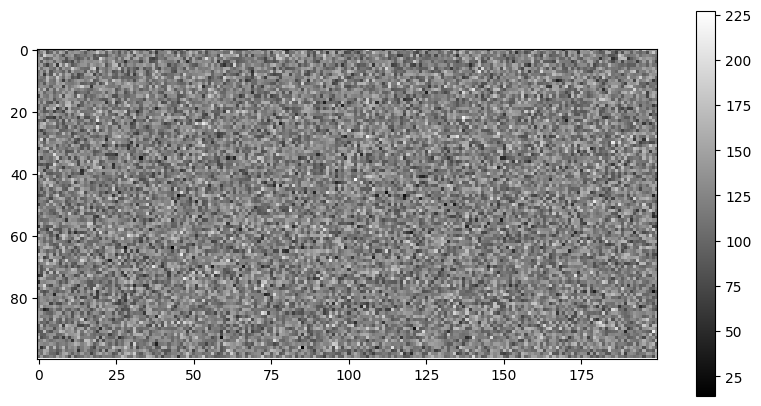

In [ ]:
import torch.nn.init as init
for m in model.modules():
    if isinstance(m, torch.nn.Conv2d):
        # 对卷积层使用kaiming正态分布初始化
        init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
            # 如果有偏置项，将偏置初始化为0
            init.constant_(m.bias, 0)
    elif isinstance(m, torch.nn.BatchNorm2d):
        # 对BatchNorm层的权重使用正态分布初始化，偏置项初始化为0
        init.constant_(m.weight, 1)
        init.constant_(m.bias, 0)
    elif isinstance(m, torch.nn.Linear):
        # 对全连接层使用正态分布初始化
        init.normal_(m.weight, 0, 0.01)
        if m.bias is not None:
            # 如果有偏置项，将偏置初始化为0
            init.constant_(m.bias, 0)
# 提取全连接层的权重和偏置
fc_weights = model.fc.weight.data  # 形状为(1000, 2048)
fc_bias = model.fc.bias.data       # 形状为(1000,)
# 将偏置扩展成一个新的行向量，并与权重矩阵合并
fc_weights_reshaped = fc_weights.t()

# 确认矩阵的形状
print("Shape of the FC matrix:", fc_weights.t())  # 应该输出: Shape of the FC matrix: torch.Size([2049, 1000])
fc_weights_normalized = (fc_weights_reshaped - fc_weights_reshaped.min()) / (fc_weights_reshaped.max() - fc_weights_reshaped.min()) * 255
fc_weights_normalized = fc_weights_normalized.numpy().astype(np.uint8)

# 由于直接保存为1000*2048的图像不太实际，这里我们简单地查看一部分数据
# 选择一部分数据进行可视化
plt.figure(figsize=(10, 5))
plt.imshow(fc_weights_normalized[:100, :200], cmap='gray')  # 只显示部分权重以便于查看
plt.colorbar()
plt.show()